# importing the dependencies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
# fetching dataset - 1
df = pd.read_csv('ElectricCarData_Norm.csv')
df.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [3]:
# checking the shape (# of rows and columns) of the datasets
print('DF Shape: ', df.shape)

DF Shape:  (103, 14)


In [4]:
# checking the info (columns, datatypes, nulls) of the datasets
print(' <<< DATASET 1 -----------------------------------------------------------')
print(df.info())

 <<< DATASET 1 -----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        103 non-null    object
 1   Model        103 non-null    object
 2   Accel        103 non-null    object
 3   TopSpeed     103 non-null    object
 4   Range        103 non-null    object
 5   Efficiency   103 non-null    object
 6   FastCharge   103 non-null    object
 7   RapidCharge  103 non-null    object
 8   PowerTrain   103 non-null    object
 9   PlugType     103 non-null    object
 10  BodyStyle    103 non-null    object
 11  Segment      103 non-null    object
 12  Seats        103 non-null    int64 
 13  PriceEuro    103 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 11.4+ KB
None


In [5]:
# getting a statistical summary of the datasets
d1 = df.describe()
display('<<< DATASET 1 >>>', d1)

'<<< DATASET 1 >>>'

,Seats,PriceEuro
count,103.000000,103.000000
mean,4.883495,55811.563107
std,0.795834,34134.665280
min,2.000000,20129.000000
25%,5.000000,34429.500000
50%,5.000000,45000.000000
75%,5.000000,65000.000000
max,7.000000,215000.000000


In [6]:
#Missing value
df.isnull().any()

Brand          False
Model          False
Accel          False
TopSpeed       False
Range          False
Efficiency     False
FastCharge     False
RapidCharge    False
PowerTrain     False
PlugType       False
BodyStyle      False
Segment        False
Seats          False
PriceEuro      False
dtype: bool

In [7]:
counts = df.nunique()
counts

Brand           33
Model          102
Accel           55
TopSpeed        25
Range           50
Efficiency      54
FastCharge      51
RapidCharge      2
PowerTrain       3
PlugType         4
BodyStyle        9
Segment          8
Seats            5
PriceEuro       87
dtype: int64

In [9]:
df.head(10)

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997
5,Lucid,Air,2.8 sec,250 km/h,610 km,180 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,F,5,105000
6,Volkswagen,e-Golf,9.6 sec,150 km/h,190 km,168 Wh/km,220 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,31900
7,Peugeot,e-208,8.1 sec,150 km/h,275 km,164 Wh/km,420 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,B,5,29682
8,Tesla,Model 3 Standard Range Plus,5.6 sec,225 km/h,310 km,153 Wh/km,650 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Sedan,D,5,46380
9,Audi,Q4 e-tron,6.3 sec,180 km/h,400 km,193 Wh/km,540 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,D,5,55000


In [ ]:
df['PowerTrain'].unique()

In [ ]:
df['BodyStyle'].unique()

In [ ]:
df['FastCharge'].unique()

In [ ]:
df['RapidCharge'].unique()

In [ ]:
df['Segment'].unique()

In [ ]:
df['PlugType'].unique()

In [13]:
# Replacing km values from the dataset
df[['FastCharge','TopSpeed','Range','Efficiency','Accel']] = df[['FastCharge','TopSpeed','Range','Efficiency','Accel']].replace(to_replace=r'([a-z/]+|[A-Z/]+)', value='', regex=True)

# mean value imputation instead of "-"

df['FastCharge']=df['FastCharge'].str.replace('-','0')

df['FastCharge']=df['FastCharge'].astype(float)

df['FastCharge'].mean()


434.56310679611653

In [14]:
df['FastCharge']=df['FastCharge'].replace(0,434.56)

df['FastCharge'].unique()

array([940.  , 250.  , 620.  , 560.  , 190.  , 220.  , 420.  , 650.  ,
       540.  , 440.  , 230.  , 380.  , 210.  , 590.  , 780.  , 170.  ,
       260.  , 930.  , 850.  , 910.  , 490.  , 470.  , 270.  , 450.  ,
       350.  , 710.  , 240.  , 390.  , 570.  , 610.  , 340.  , 730.  ,
       920.  , 434.56, 550.  , 900.  , 520.  , 430.  , 890.  , 410.  ,
       770.  , 460.  , 360.  , 810.  , 480.  , 290.  , 330.  , 740.  ,
       510.  , 320.  , 500.  ])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        103 non-null    object 
 1   Model        103 non-null    object 
 2   Accel        103 non-null    float64
 3   TopSpeed     103 non-null    int32  
 4   Range        103 non-null    int32  
 5   Efficiency   103 non-null    int32  
 6   FastCharge   103 non-null    float64
 7   RapidCharge  103 non-null    object 
 8   PowerTrain   103 non-null    object 
 9   PlugType     103 non-null    object 
 10  BodyStyle    103 non-null    object 
 11  Segment      103 non-null    object 
 12  Seats        103 non-null    int64  
 13  PriceEuro    103 non-null    int64  
dtypes: float64(2), int32(3), int64(2), object(7)
memory usage: 10.2+ KB


In [22]:
df['Accel'] = df['Accel'].astype(str).astype(float)
df['TopSpeed'] = df['TopSpeed'].astype(str).astype(int)
df['Range'] = df['Range'].astype(str).astype(int)
df['Efficiency'] = df['Efficiency'].astype(str).astype(int)
df['FastCharge'] = df['FastCharge'].astype(str).astype(float)

In [21]:
df.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


# EDA Analysis

## PriceEuro visualization from dataset

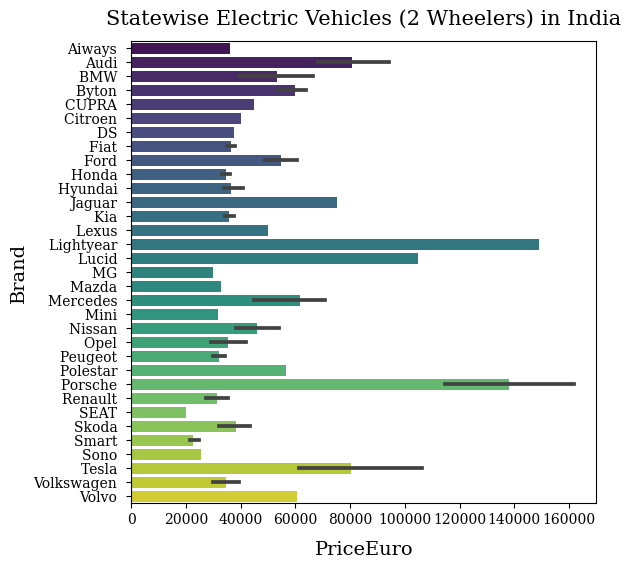

In [10]:
# PriceEuro visualization from dataset
plt.figure(figsize=(6, 6))
sns.barplot(data=df, y=df['Brand'].sort_values(ascending=True), x='PriceEuro', palette='viridis')
plt.ylabel('Brand', fontsize=14, family='serif')
plt.xlabel('PriceEuro', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Brandwise PriceEuro', weight=200, family='serif', size=15, pad=12)
plt.show()

## FastCharge as per Number of RapidCharge

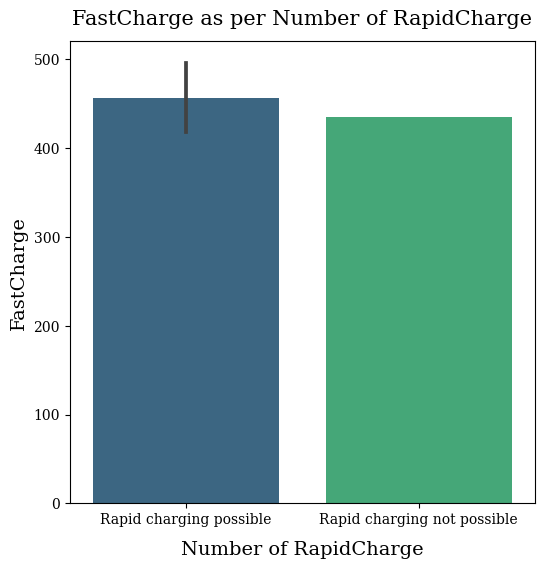

In [15]:

plt.figure(figsize=(6, 6))
sns.barplot(data=df, y=df['FastCharge'].sort_values(ascending=True), x='RapidCharge', palette='viridis')
plt.ylabel('FastCharge', fontsize=14, family='serif')
plt.xlabel('Number of RapidCharge', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='FastCharge as per Number of RapidCharge', weight=200, family='serif', size=15, pad=12)
plt.show()

## Acceleration for Charging EVs as per Brand

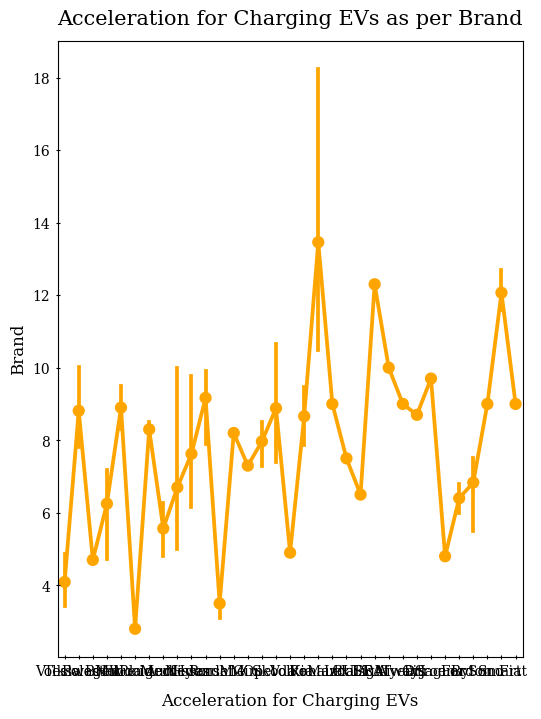

In [29]:

plt.figure(figsize=(6, 8))
sns.pointplot(data=df, y='Accel', x='Brand', color='orange')
plt.xlabel('Acceleration for Charging EVs', family='serif', size=12, labelpad=10)
plt.ylabel('Brand', family='serif', size=12)
plt.tick_params(direction='inout')
plt.xticks(family='serif', size=10)
plt.yticks(family='serif', size=10)
plt.title(label='Acceleration for Charging EVs as per Brand', weight=200, family='serif', size=15, pad=12)
plt.show()

## brand-wise count of EV models

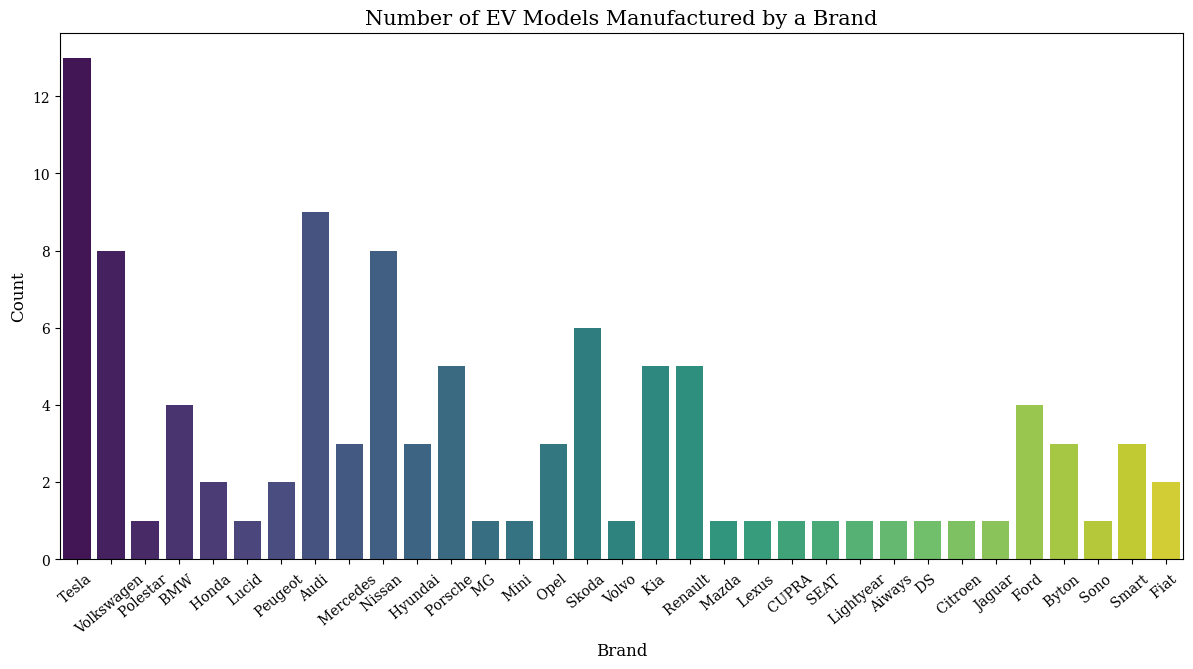

In [30]:

sns.catplot(data=df, x='Brand', kind='count', palette='viridis', height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Number of EV Models Manufactured by a Brand', family='serif', size=15)
plt.show()

## different body types EVs visualization from dataset

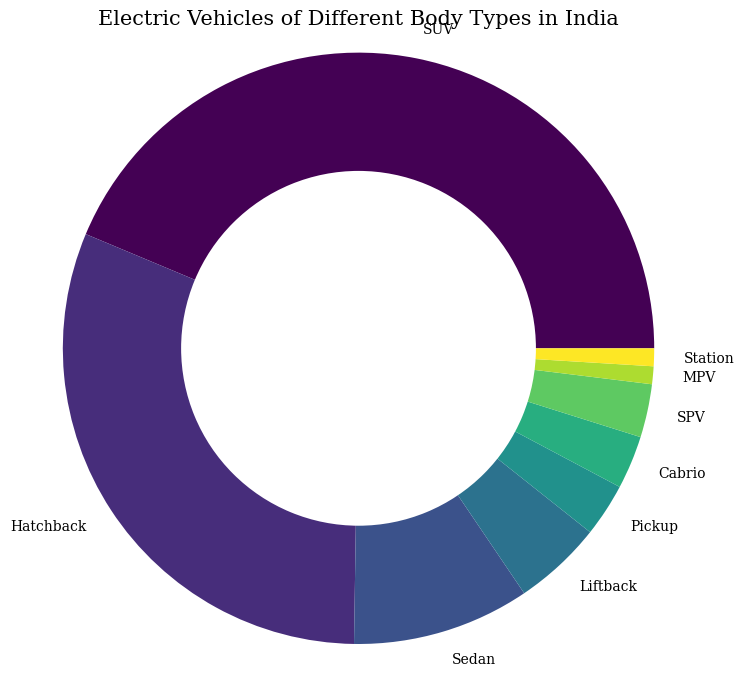

In [31]:

x = df['BodyStyle'].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict(family='serif'))
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Electric Vehicles of Different Body Types in India', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()

## analysis of different segments of EVs from dataset

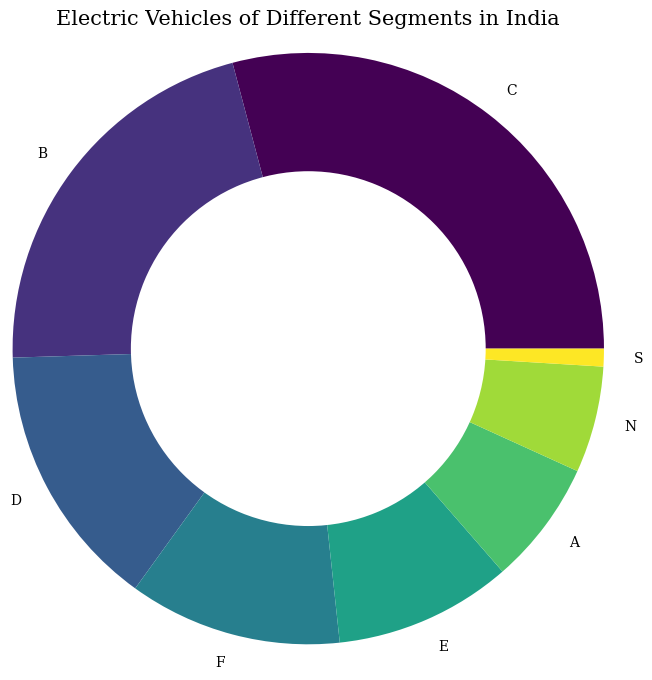

In [32]:

x = df['Segment'].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict(family='serif'), pctdistance=.5)
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Electric Vehicles of Different Segments in India', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()

## EVs of different number of seats from dataset 

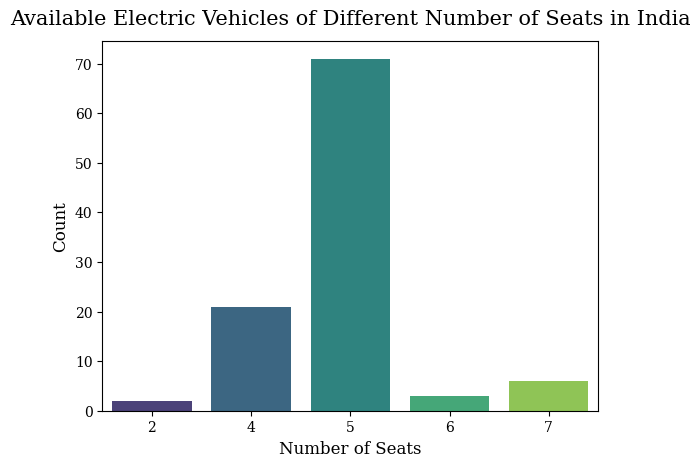

In [33]:

sns.countplot(data=df, x='Seats', palette='viridis')
plt.xlabel('Number of Seats', family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Available Electric Vehicles of Different Number of Seats in India', family='serif', size=15, pad=12)
plt.show()

## brand-wise analysis of the number of seats

C:\Users\Darshan\AppData\Local\Temp\ipykernel_7440\4229720725.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(kind='bar', data=df, x='Brand', y='Seats', palette='viridis', ci=None, height=6, aspect=2)


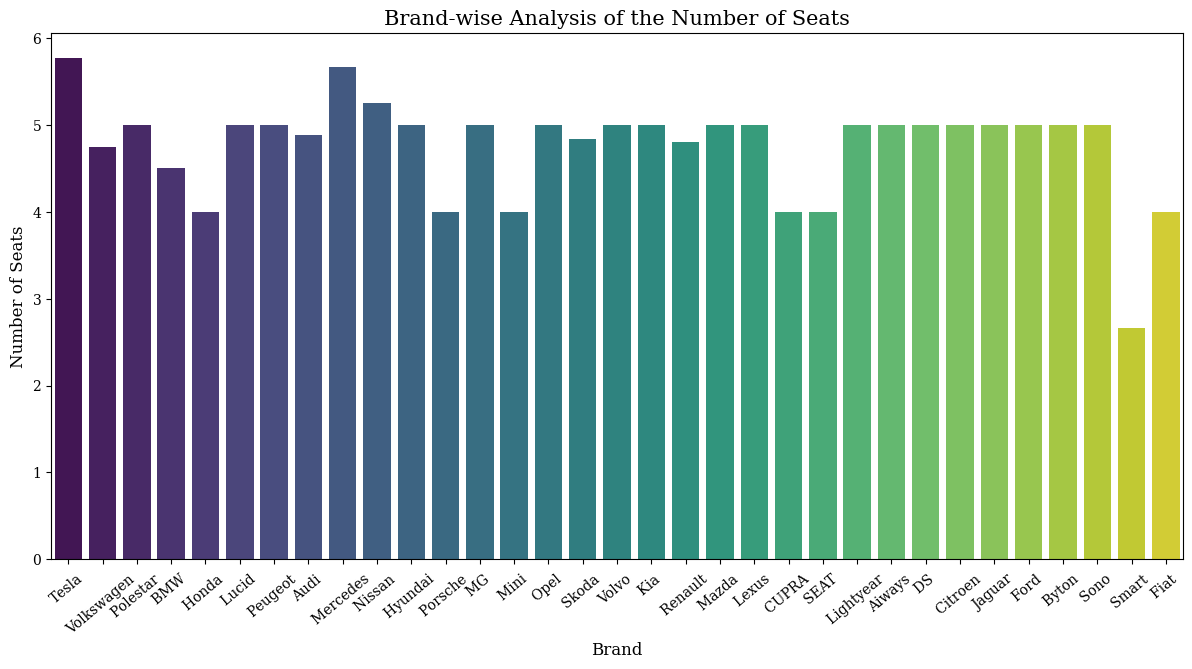

In [34]:

sns.catplot(kind='bar', data=df, x='Brand', y='Seats', palette='viridis', ci=None, height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Number of Seats', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Analysis of the Number of Seats', family='serif', size=15);

## plug types visualization from dataset

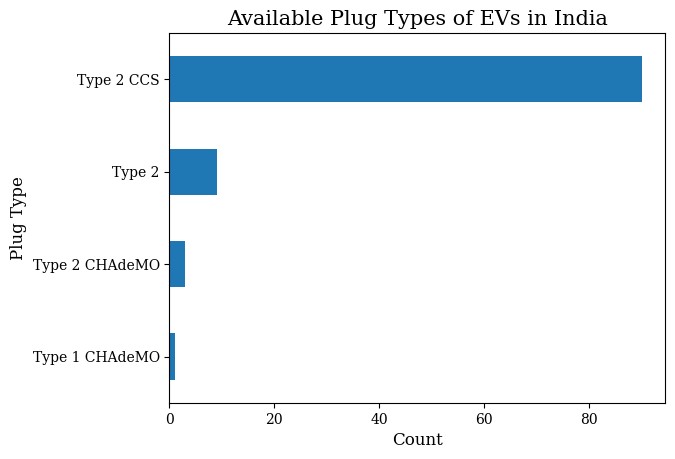

In [35]:

df['PlugType'].value_counts().sort_values(ascending=True).plot.barh()
plt.xlabel('Count', family='serif', size=12)
plt.ylabel('Plug Type', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Available Plug Types of EVs in India', family='serif', size=15)
plt.show()

## plotting the price from dataset

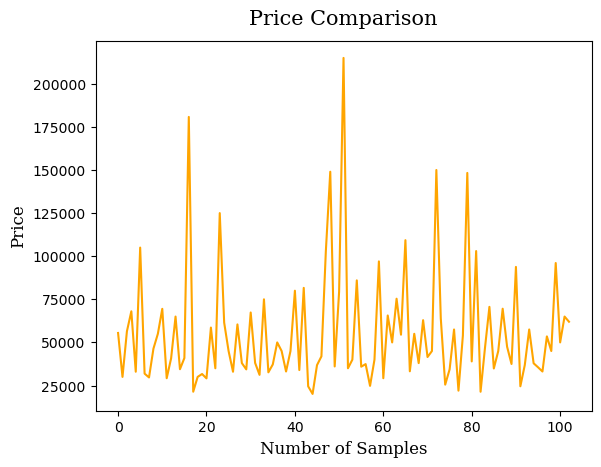

In [36]:

plt.plot(df['PriceEuro'], color='orange')
plt.xlabel('Number of Samples', family='serif', size=12)
plt.ylabel('Price', family='serif', size=12)
plt.title('Price Comparison', family='serif', size=15, pad=12);

## accleration visualization from dataset

C:\Users\Darshan\AppData\Local\Temp\ipykernel_7440\1363031324.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, y='Brand', x='Accel', ci=None, palette='viridis')


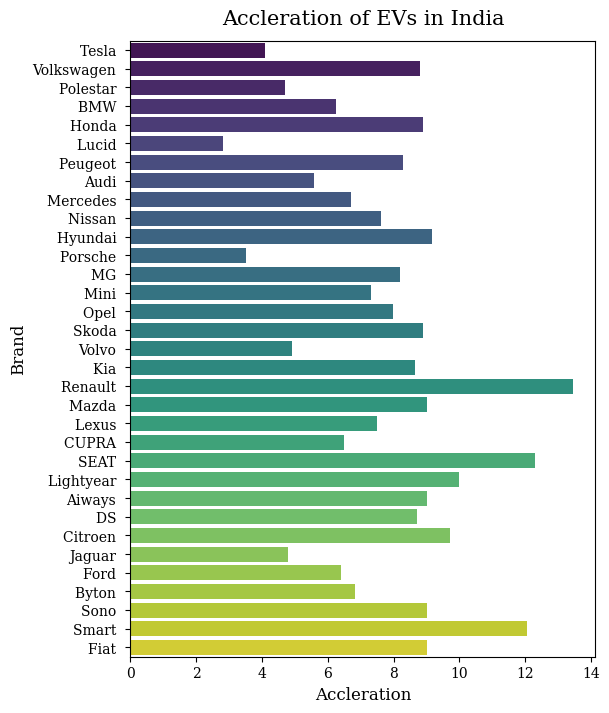

In [38]:

plt.figure(figsize=(6, 8))
sns.barplot(data=df, y='Brand', x='Accel', ci=None, palette='viridis')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Accleration', family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)
plt.title(label='Accleration of EVs in India', family='serif', size=15, pad=12)
plt.show()

# speed visualization from dataset

C:\Users\Darshan\AppData\Local\Temp\ipykernel_7440\4115011134.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='TopSpeed', y='Brand', ci=None, palette='viridis')


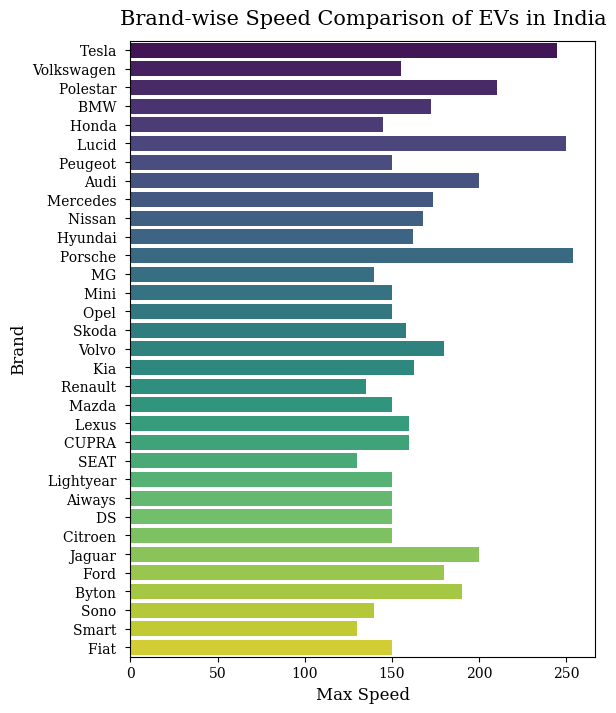

In [40]:

plt.figure(figsize=(6, 8))
sns.barplot(data=df, x='TopSpeed', y='Brand', ci=None, palette='viridis')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Max Speed', family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)
plt.title(label='Brand-wise Speed Comparison of EVs in India', family='serif', size=15, pad=12)
plt.show()

## plotting the correlation matrix from dataset

C:\Users\Darshan\AppData\Local\Temp\ipykernel_7440\2698470761.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True, cmap='Purples', cbar=False, square=True, fmt='.2f', linewidths=.3)


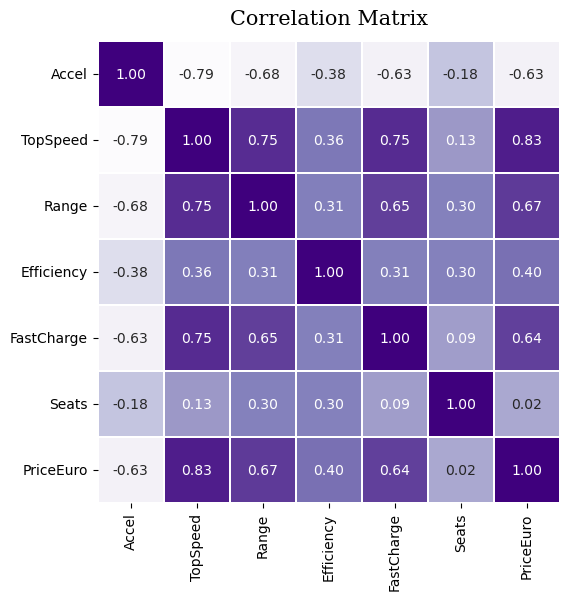

In [41]:

plt.figure(figsize=(6,6))
sns.heatmap(data=df.corr(), annot=True, cmap='Purples', cbar=False, square=True, fmt='.2f', linewidths=.3)
plt.title('Correlation Matrix', family='serif', size=15, pad=12);

In [32]:
df1=df.drop(['Brand','Model'],axis=1)

In [33]:
df1.head()

,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,4.6,233,450,161,940.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,10.0,160,270,167,250.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,4.7,210,400,181,620.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,6.8,180,360,206,560.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,9.5,145,170,168,190.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


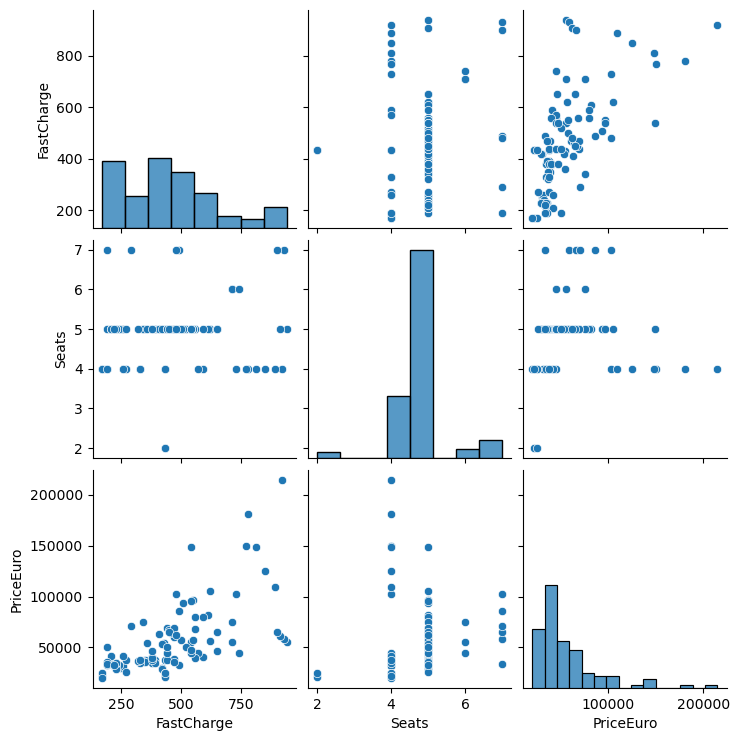

In [34]:
sns.pairplot(df1)
plt.show()

In [35]:
df['PowerTrain'].unique()

array(['All Wheel Drive', 'Rear Wheel Drive', 'Front Wheel Drive'],
      dtype=object)

In [38]:
# encoding the categorical features

# PowerTrain feature
df1['PowerTrain'].replace(to_replace=['Rear Wheel Drive','Front Wheel Drive','All Wheel Drive'],value=[0, 1, 2],inplace=True)

# RapidCharge feature
df1['RapidCharge'].replace(to_replace=['Rapid charging not possible','Rapid charging possible'],value=[0, 1],inplace=True)

In [36]:
df['RapidCharge'].unique()

array(['Rapid charging possible', 'Rapid charging not possible'],
      dtype=object)

In [39]:
df1.head()

,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,4.6,233,450,161,940.0,1,2,Type 2 CCS,Sedan,D,5,55480
1,10.0,160,270,167,250.0,1,0,Type 2 CCS,Hatchback,C,5,30000
2,4.7,210,400,181,620.0,1,2,Type 2 CCS,Liftback,D,5,56440
3,6.8,180,360,206,560.0,1,0,Type 2 CCS,SUV,D,5,68040
4,9.5,145,170,168,190.0,1,0,Type 2 CCS,Hatchback,B,4,32997


In [40]:
df1['PlugType'].unique()

array(['Type 2 CCS', 'Type 2 CHAdeMO', 'Type 2', 'Type 1 CHAdeMO'],
      dtype=object)

In [41]:
df1['BodyStyle'].unique()

array(['Sedan', 'Hatchback', 'Liftback', 'SUV', 'Pickup', 'MPV', 'Cabrio',
       'SPV', 'Station'], dtype=object)

In [42]:
df1['Segment'].unique()

array(['D', 'C', 'B', 'F', 'A', 'E', 'N', 'S'], dtype=object)

In [44]:
# selecting features for building a model
X = df1[['Accel','TopSpeed','Efficiency','FastCharge', 'Range', 'RapidCharge', 'Seats', 'PriceEuro','PowerTrain']]

In [45]:
X

,Accel,TopSpeed,Efficiency,FastCharge,Range,RapidCharge,Seats,PriceEuro,PowerTrain
0,4.6,233,161,940.0,450,1,5,55480,2
1,10.0,160,167,250.0,270,1,5,30000,0
2,4.7,210,181,620.0,400,1,5,56440,2
3,6.8,180,206,560.0,360,1,5,68040,0
4,9.5,145,168,190.0,170,1,4,32997,0
...,...,...,...,...,...,...,...,...,...
98,7.5,160,191,440.0,330,1,5,45000,1
99,4.5,210,258,540.0,335,1,5,96050,2
100,5.9,200,194,440.0,325,1,5,50000,2
101,5.1,200,232,450.0,375,1,5,65000,2


In [46]:
# feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means segmentation using PCA

In [47]:
# applying Principle Component Analysis (PCA)
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.311940,0.760181,-0.979624,0.945141,1.146520,-1.367247,0.323251,0.483579,-0.432717
1,-2.016489,-0.573594,-0.661054,0.461811,-0.432540,0.463551,-0.405186,-0.187955,-0.303492
2,1.508556,0.074835,-0.369083,-0.058735,0.681526,-0.768393,0.241258,-0.144692,-0.093466
3,0.214101,0.091437,-0.067733,0.890923,-1.355970,0.199131,-0.401957,0.360198,0.160361
4,-2.660856,0.121138,-0.812605,-0.649438,-0.854279,0.187440,-0.486397,0.016659,-0.152912


C:\Users\Darshan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Darshan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Darshan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Darshan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

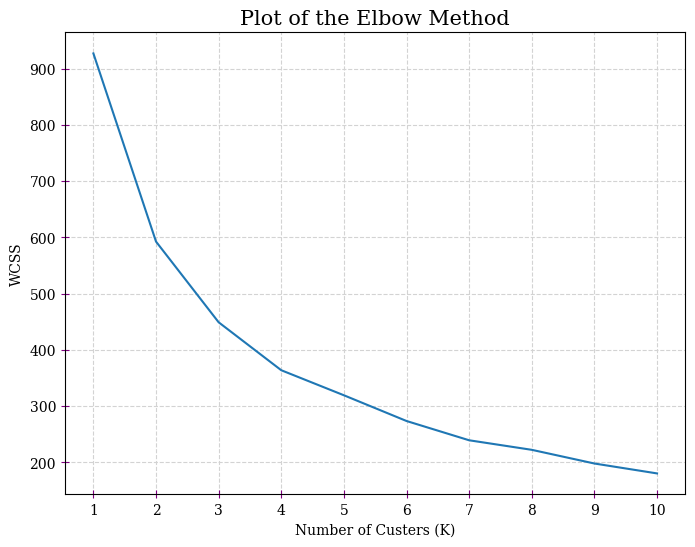

In [48]:
# plotting the results of Elbow

wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [49]:
# training the model using k=4 as rendered by the above plot
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)

C:\Users\Darshan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Darshan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=90)

In [50]:
# check the labels assigned to each data point
print(kmean.labels_)

[0 1 2 1 1 0 1 1 1 2 2 1 1 2 1 1 0 1 1 1 1 2 1 0 0 1 1 2 1 1 2 1 1 2 1 1 1
 1 1 2 0 1 2 1 1 1 1 0 0 1 2 0 1 1 2 1 1 3 1 0 1 2 2 2 1 0 1 2 3 2 1 2 0 2
 1 1 2 3 2 0 1 2 3 1 2 1 2 2 2 1 2 3 1 2 1 1 1 1 1 2 2 2 2]


In [51]:
# check the size of clusters
pd.Series(kmean.labels_).value_counts()

1    53
2    32
0    13
3     5
dtype: int64

In [52]:
# adding a new feature of cluster labels to the dataset 3
df1['clusters'] = kmean.labels_

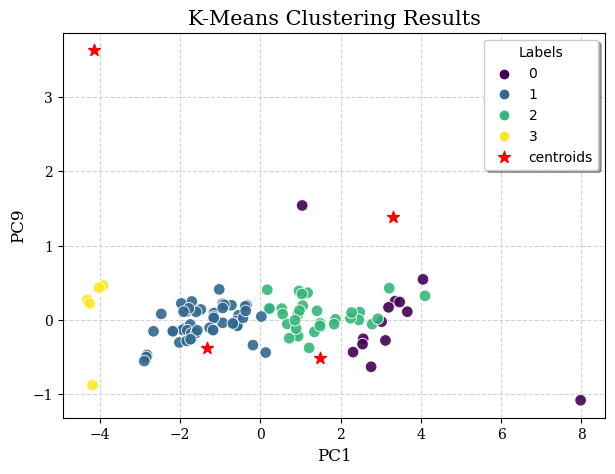

In [53]:
# visualizing clusters
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC9', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC9', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()